## Connect to DataJoint server
#### Downloading data from S3 will require your own AWS credentials

In [4]:
import datajoint as dj
import numpy as np
import json
from utilities import *
from subprocess import call

# Connect to datajoint server
dj.conn()

Connecting alex@ucsd-demo-db.datajoint.io:3306


DataJoint connection (connected) alex@ucsd-demo-db.datajoint.io:3306

In [5]:
# Define which schema you're using
schema = dj.schema('common_atlas_v2')
schema.spawn_missing_classes()

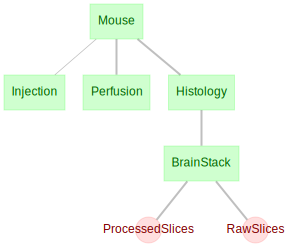

In [6]:
dj.ERD(schema)

## Printing all table headers (every stack in the db)

In [14]:
brainStackTables = (BrainStack()).fetch( as_dict=True )
for brainStackTable in brainStackTables:
    print( brainStackTable['mouse'] )

CHATM2
CHATM3
CSHL2
MD175
MD585
MD589
MD590
MD591
MD592
MD593
MD594
MD595
MD598
MD599
MD602
MD603
MD635
MD636
MD639
MD642
MD652
MD653
MD657
MD658
MD661
MD662
UCSD001


## Load dictionary of brain names from utilities.py

In [3]:
# From utilities.py
all_stacks = list( brain_names_dic.keys() )
print( all_stacks )

['MD585', 'MD589', 'MD590', 'MD591', 'MD592', 'MD593', 'MD594', 'MD595', 'MD598', 'MD599', 'MD602', 'MD603', 'CHATM2', 'CHATM3', 'CSHL2', 'MD658', 'MD661', 'MD662', 'MD635', 'MD636', 'MD639', 'MD642', 'MD652', 'MD653', 'MD657', 'MD175', 'UCSD001']


## List all Section-names & Section-numbers for a given stack
#### - Example displaying MD585 sections
`Placeholder` indicates a damaged section, not used in the pipeline

In [4]:
stack = 'MD585'
MD585_stack_info = (BrainStack()&dict(mouse=stack)).fetch( as_dict=True )[0]
print( 'Keys for <STACK>_stack_info:')
print( MD585_stack_info.keys() )

# `MD585_sections` contains a list of every filename, <space>, and the section number
#    If filename == 'Placeholder' then the section is unusable and not used in the pipeline
MD585_sections = MD585_stack_info['sorted_filenames'].split('|')

Keys for <STACK>_stack_info:
odict_keys(['mouse', 'stack_name', 'num_slices', 'num_valid_slices', 'channels', 'sorted_filenames', 'human_annotated', 'planar_resolution_um', 'section_thickness_um'])


## Access Raw Data
#### - Example accessing MD585 data

In [5]:
# Going through each brain, prints out brains that do NOT have raw data
for stack in all_stacks:
    # rawstack_info keys: ['mouse', 'aws_bucket', 'processed_stack']
    raw_stack_info = (RawSlices()&dict(mouse=stack)).fetch( as_dict=True )[0]
    if raw_stack_info['raw_stack']=='':
        print(raw_stack_info['mouse'])
        print( '  - Has no raw data on S3' )

CHATM2
  - Has no raw data on S3
CHATM3
  - Has no raw data on S3
CSHL2
  - Has no raw data on S3
MD639
  - Has no raw data on S3
MD175
  - Has no raw data on S3


In [6]:
stack = 'MD585'
# Load RawStack table (as dict) for a particular stack
raw_stack_info = (RawSlices()&dict(mouse=stack)).fetch( as_dict=True )[0]

bucket =  raw_stack_info['aws_bucket']
filename_list = raw_stack_info['raw_stack'].split('|')

print( 'The 100th slice of '+stack+' with the bucket appended to the front:\n' )
fp = bucket + '://' + filename_list[100]
print( fp )

The 100th slice of MD585 with the bucket appended to the front:

mousebrainatlas-rawdata://CSHL_data/MD585/MD585-IHC42-2015.08.19-14.26.30_MD585_1_0124_lossless.jp2


## Access Processed Data
#### - Example accessing MD585 data

In [7]:
# Going through each brain, prints out brains that do NOT have processed data
for stack in all_stacks:
    # rawstack_info keys: ['mouse', 'aws_bucket', 'processed_stack']
    processed_stack_info = (ProcessedSlices()&dict(mouse=stack)).fetch( as_dict=True )[0]
    if processed_stack_info['processed_stack']=='':
        print(processed_stack_info['mouse'])
        print( '  - Has no processed data on S3' )

CHATM2
  - Has no processed data on S3
CHATM3
  - Has no processed data on S3
CSHL2
  - Has no processed data on S3
MD636
  - Has no processed data on S3
MD639
  - Has no processed data on S3
MD175
  - Has no processed data on S3
UCSD001
  - Has no processed data on S3


In [8]:
stack = 'MD585'
# Load ProcessedStack table (as dict) for a particular stack
processed_stack_info = (ProcessedSlices()&dict(mouse=stack)).fetch( as_dict=True )[0]

bucket =  processed_stack_info['aws_bucket']
filename_list = processed_stack_info['processed_stack'].split('|')

print( 'The 100th slice of '+stack+' with the bucket appended to the front:\n' )
fp = bucket + '/' + filename_list[100]
print( fp )

The 100th slice of MD585 with the bucket appended to the front:

mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless/MD585-IHC50-2015.07.16-18.02.54_MD585_2_0149_prep2_lossless.tif


# Download Images from S3 to Local Computer
(Relies on `bucket` and `filename_list` from previous cell)

In [9]:
from subprocess import call

# `fp` includes the S3 bucket as shown belows
def download_from_s3(local_root, fp):
    s3_url = "s3://"+fp
    local_fp = local_root+fp
    
    print('Downloading file to ' + local_fp)

    call(["aws",\
          "s3",\
          "cp",\
          s3_url,\
          local_fp])

In [10]:
stack = 'MD585'
# Contains all information on downloading processed files (post-preprocessing images)
processed_stack_info = (ProcessedSlices()&dict(mouse=stack)).fetch( as_dict=True )[0]
bucket =  processed_stack_info['aws_bucket']
filename_list = processed_stack_info['processed_stack'].split('|')
num_slices = len(filename_list)

# Using `download_from_s3` on my desktop to download first 10 files of MD585
#   and then display a downsampled version of it
local_root_alex_pc = "/mnt/c/Users/Alex/Documents/"

# Downloading valid sections 150-151
for i in range(150,152):
    fp = bucket+'/'+filename_list[i]
    download_from_s3( local_root_alex_pc, fp)


KeyboardInterrupt

